## H2020 project objective analyse

Starting from data published by the commission on H2020 projects at https://data.europa.eu/euodp/en/data/dataset/cordisH2020projects we do some data mining. Especially we look for textile related projects to do some statistics.

In [1]:
import pandas as pd
import csv

#modules for NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

from collections import Counter

##### Dataset files were downloaded locally

reports = pd.read_csv('C:/Users/jl/Downloads/h2020reports.csv', sep= ";", encoding='LATIN1') <br/>
organisations = pd.read_csv('C:/Users/jl/Downloads/h2020organizations.csv', sep= ";", encoding='LATIN1', ) <br/>
deliverables = pd.read_csv('C:/Users/jl/Downloads/h2020projectDeliverables.csv', sep= ";",encoding='LATIN1') <br/>
projects = pd.read_csv('C:/Users/jl/Downloads/h2020projects.csv', sep= ";",encoding='LATIN1')

In [2]:
projects = pd.read_csv('C:/Users/jl/Downloads/h2020projects.csv', sep= ";",encoding='UTF-8')
programmes = pd.read_csv('C:/Users/jl/Downloads/h2020programmes.csv', sep= ";",encoding='UTF-8')
topics = pd.read_csv('C:/Users/jl/Downloads/h2020topics.csv', sep= ";",encoding='LATIN1')

In [3]:
# concatenize programmes & topics
topics_programmes = pd.concat([programmes,topics], sort = False)

In [4]:
topics_programmes.head()

,rcn,code,title,shortTitle,language
0,664357,H2020-EU.3.4.,"RETOS DE LA SOCIEDAD - Transporte inteligente,...",Transport,es
1,664321,H2020-EU.3.3.,"WYZWANIA SPOŁECZNE - Bezpieczna, czysta i efek...",Energy,pl
2,664233,H2020-EU.2.3.2.3.,Wsparcie innowacji rynkowych,Supporting market-driven innovation,pl
3,664281,H2020-EU.3.2.,"RETOS DE LA SOCIEDAD - Seguridad alimentaria, ...","Food, agriculture, forestry, marine research a...",es
4,664235,H2020-EU.3.,PRIORITÉ «Défis de société»,Societal Challenges,fr


In [5]:
# Total number of projects in the file
print("Total number of projects in file is {}".format(len(projects)))

Total number of projects in file is 24554


In [6]:
# Selecting the projects which have the words textiles or clothing in the objectives
projects['lobjective'] = projects['objective'].str.lower()
terms = ['textile','textiles','clothing']
terms = '|'.join(terms)
p_textile = projects.loc[projects['lobjective'].str.contains(terms, na=False),:]
print("Total number of textile & clothing related projects is {}".format(p_textile.shape[0]))

Total number of textile & clothing related projects is 188


In [7]:
# Adding programme and topic information on the textile projects
textile = pd.merge(p_textile, topics_programmes, how='left', left_on ="topics", right_on ="code")
textile.rename({'title_x': 'projectTitle', 'title_y':'callTitle'}, inplace=True, axis=1)
textile.drop(['code','language', 'rcn_x','rcn_y','id','subjects','shortTitle'], axis=1, inplace=True)

In [8]:
textile.head()

,acronym,status,programme,topics,frameworkProgramme,projectTitle,startDate,endDate,projectUrl,objective,totalCost,ecMaxContribution,call,fundingScheme,coordinator,coordinatorCountry,participants,participantCountries,lobjective,callTitle
0,C-VoUCHER,SIGNED,H2020-EU.2.3.2.2.;H2020-EU.2.3.2.3.,INNOSUP-01-2016-2017,H2020,Circularize ValUe CHains across European Regio...,2018-04-01,2021-03-31,NaN,C-VoUCHER aims to develop new circular (cradle...,"5205836,89","4999393,5",H2020-INNOSUP-01-2017-twoStage,IA,FUNDINGBOX ACCELERATOR SP ZOO,PL,SYSTEM@TIC PARIS REGION;AGENCJA ROZWOJU MAZOWS...,FR;PL;DK;RO;ES;SE,c-voucher aims to develop new circular (cradle...,Cluster facilitated projects for new industria...
1,MATUROLIFE,SIGNED,H2020-EU.2.1.3.,NMBP-05-2017,H2020,Metallisation of Textiles to make Urban living...,2018-01-01,2020-12-31,NaN,Urban areas are seeing an increasing populatio...,5990075,"5050370,75",H2020-NMBP-2017-two-stage,IA,COVENTRY UNIVERSITY,UK,EUROCARERS-ASSOCIATION EUROPEENNE TRAVAILLANT ...,BE;ES;FR;TR;DE;SI;UK;PL;IT,urban areas are seeing an increasing populatio...,Advanced materials and innovative design for i...
2,CGM,CLOSED,H2020-EU.2.1.5.;H2020-EU.2.1.3.;H2020-EU.2.3.1...,SMEInst-02-2016-2017,H2020,A next generation nanomedia that can be tailor...,2017-06-01,2017-09-30,http://www.customem.com,Customem Ltd is a company founded in 2014 with...,71429,50000,H2020-SMEINST-1-2016-2017,SME-1,CUSTOMEM LTD,UK,NaN,NaN,customem ltd is a company founded in 2014 with...,Accelerating the uptake of nanotechnologies ad...
3,Green-linker,CLOSED,H2020-EU.3.5.;H2020-EU.2.3.1.,SMEInst-11-2016-2017,H2020,Innovative eco-friendly crosslinker for leathe...,2017-05-01,2017-08-31,http://www.italkemsrl.it/,Crosslinkers are substances with a catalytic a...,71429,50000,H2020-SMEINST-1-2016-2017,SME-1,ITALKEM SRL,IT,NaN,NaN,crosslinkers are substances with a catalytic a...,Boosting the potential of small businesses in ...
4,CRYSTAL,CLOSED,H2020-EU.2.1.5.;H2020-EU.2.1.3.;H2020-EU.2.3.1...,SMEInst-02-2016-2017,H2020,New innovative textile cutting machine,2016-11-01,2017-02-28,http://www.crystal-cut.it/,'The textile sector is a multi-million industr...,71429,50000,H2020-SMEINST-1-2016-2017,SME-1,BIERREBI ITALIA SRL,IT,NaN,NaN,'the textile sector is a multi-million industr...,Accelerating the uptake of nanotechnologies ad...


In [9]:
# adding totalcost and ecMaxcontribution of all projects together
textile['ecMaxContribution'] = textile['ecMaxContribution'].str.replace(",",".")
ecMAx = textile['ecMaxContribution'].astype(float).sum()
textile['totalCost'] = textile['totalCost'].str.replace(",",".")
cost = textile['totalCost'].astype(float).sum()

In [10]:
print('total cost                : {:.2f} €'.format(cost))
print('total Max EC contribution : {:.2f} €'.format(ecMAx))

total cost                : 397179320.28 €
total Max EC contribution : 326148489.98 €


In [11]:
# Average funding in %
print("Average funding in FP7 for textile related projects is {:.2f} %".format(ecMAx/cost*100))

Average funding in FP7 for textile related projects is 82.12 %


In [47]:
# participation statistics
# wWho participated (as coordinator or as participants) in textile projects

participants_list_textile_projects=[]
for element in textile['participants']:
    if isinstance(element, str) :
        l= element.split(';')
        participants_list_textile_projects += l

for element in textile['coordinator']:
    if isinstance(element, str) :
        l = element.split(';')
        participants_list_textile_projects += l

participants_list_textile_projects_s = pd.Series(participants_list_textile_projects)

# How is this related to the overall participation of each partner?

participants_list_all_projects=[]
for element in projects['participants']:
    if isinstance(element, str) :
        l= element.split(';')
        participants_list_all_projects += l

for element in projects['coordinator']:
    if isinstance(element, str) :
        l= element.split(';')
        participants_list_all_projects += l
        
participants_list_all_projects_s = pd.Series(participants_list_all_projects)
        
#participants_participation_textile_projects_s = participants_list_textile_projects_s.value_counts()
participants_participation_textile_projects_s = pd.DataFrame(participants_list_textile_projects_s.value_counts())

participants_participation_all_projects_s = pd.DataFrame(participants_list_all_projects_s.value_counts())

all_participations = participants_participation_textile_projects_s.merge(participants_participation_all_projects_s, left_index = True, right_index = True, how = 'left')
all_participations.columns = ['participation in textile projects','overall participation']

In [48]:
all_participations

,participation in textile projects,overall participation
KOBENHAVNS UNIVERSITET,10,466
CENTRE SCIENTIFIQUE & TECHNIQUE DE L'INDUSTRIE TEXTILE BELGE,7,15
Teknologian tutkimuskeskus VTT Oy,7,274
AIMPLAS - ASOCIACION DE INVESTIGACION DE MATERIALES PLASTICOS Y CONEXAS,5,26
FRAUNHOFER GESELLSCHAFT ZUR FOERDERUNG DER ANGEWANDTEN FORSCHUNG E.V.,5,756
HOEGSKOLAN I BORAS,5,8
UNIVERSITEIT GENT,5,217
FUNDACION CIDETEC,4,33
UNIVERZA V MARIBORU,4,20
AVANTIUM CHEMICALS BV,4,17


In [13]:
# Number of unique participations
print("The number of unique participants in FP7 textile & clothing projects is {}".format(len(participants_list_textile_projects_s.drop_duplicates())))

The number of unique participants in FP7 textile & clothing projects is 632


In [14]:
# Number of projects in programmes 

fs = textile[['fundingScheme','acronym','totalCost','ecMaxContribution','coordinatorCountry']]
# fs.sort_values(by = 'fundingScheme')
fs.groupby(['fundingScheme'])['acronym'].count()

fundingScheme
BBI-IA-DEMO        2
BBI-IA-FLAG        1
BBI-RIA            4
CS2-IA             2
CSA                3
ERC-ADG            4
ERC-COG            6
ERC-POC            7
ERC-STG            3
IA                21
MSCA-IF-EF-CAR     3
MSCA-IF-EF-RI      3
MSCA-IF-EF-SE      1
MSCA-IF-EF-ST     26
MSCA-IF-GF         1
MSCA-ITN-EID       1
MSCA-ITN-ETN       6
MSCA-RISE          3
RIA               19
SME-1             51
SME-2             21
Name: acronym, dtype: int64

In [15]:
# # Number of projects in topics

textile.groupby(['topics'])['acronym'].count()

topics
BBI-2016-D05                  1
BBI-2016-F02                  1
BBI-2016-R07                  1
BBI.2017.D5                   1
BBI.2018.SO2.R6               1
BBI.2018.SO3.R10              1
BBI.VC2.R6-2015               1
CE-NMBP-26-2018               1
CE-SC5-01-2018                1
CULT-COOP-09-2017             1
EIC-SMEInst-2018-2020        21
ERC-2016-ADG                  1
ERC-2016-COG                  1
ERC-2016-STG                  1
ERC-2017-ADG                  2
ERC-2017-COG                  1
ERC-2017-PoC                  2
ERC-2018-ADG                  1
ERC-2018-COG                  2
ERC-CoG-2014                  1
ERC-CoG-2015                  1
ERC-PoC-2015                  4
ERC-PoC-2016                  1
ERC-StG-2014                  1
ERC-StG-2015                  1
FETOPEN-03-2018-2019-2020     1
FTIPilot-01-2016              2
ICT-02-2018                   3
ICT-03-2014                   1
ICT-14-2016-2017              1
                             ..
N

In [16]:
# participant countries statistics

participant_countries_list=[]

for element in textile['participantCountries']:
    if isinstance(element, str) :
        l = element.split(';')
        participant_countries_list += l

for element in textile['coordinatorCountry']:
    if isinstance(element, str) :
        l= element.split(';')
        participant_countries_list += l

participant_countries_list_s = pd.Series(participant_countries_list)

participant_countries_list_s.value_counts()

IT    70
ES    68
UK    52
DE    46
FR    34
NL    33
BE    32
SE    27
DK    23
PT    20
FI    19
CH    14
SI    13
TR    13
AT    12
EL    12
PL    10
IL     8
IE     7
RO     5
CZ     4
HR     4
RS     3
IN     2
CY     2
NO     2
EE     2
IS     2
LU     1
GL     1
UA     1
HU     1
BG     1
RU     1
LT     1
dtype: int64

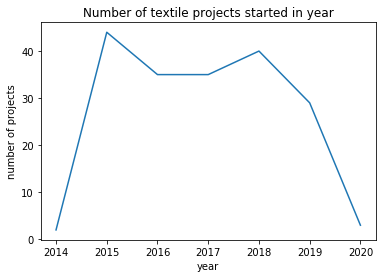

In [98]:
# number of accepted projects in year
import datetime
import matplotlib.pyplot as plt
fmt = "%Y-%m-%d"
textile['startDate'] = pd.to_datetime(textile['startDate'], format=fmt)
textile['startingYear'] = textile['startDate'].dt.year
projects_per_year = pd.DataFrame(textile.groupby(['startingYear'])['acronym'].count())

ax= plt.subplot()
x = projects_per_year.index
y = projects_per_year['acronym']
ax.set_title("Number of textile projects started in year")
ax.set_xlabel("year")
ax.set_ylabel('number of projects')
plt.plot(x,y)
plt.show()

In [17]:
# tokenize the objectives of each project
# I used RegexpTokenize to eliminate punctuation, ...
textile.fillna("missing", inplace=True)
objectives = textile[['acronym','projectTitle','objective','startDate','endDate','callTitle', 'coordinator', 'coordinatorCountry', 'participants','participantCountries','programme', 'topics']].values.tolist()


for i in range(0,len(objectives)-1):
    row = objectives[i][2]

    tokenizer = RegexpTokenizer(r'\w+\D+.\D+')      
    tokens = nltk.word_tokenize(row)
    stopWords = set(stopwords.words('english'))
    par_cleaned = [token for token in tokens if token not in stopWords] 

    NN=[]
    for element in par_cleaned:
        words = tokenizer.tokenize(element) 
        tagged = nltk.pos_tag(words)
        if tagged:
            if "NN" in tagged[0][1]:
                NN.append(tagged[0][0])
    objectives[i].append(Counter(NN).most_common(10))
        


In [18]:
textile.head()

,acronym,status,programme,topics,frameworkProgramme,projectTitle,startDate,endDate,projectUrl,objective,totalCost,ecMaxContribution,call,fundingScheme,coordinator,coordinatorCountry,participants,participantCountries,lobjective,callTitle
0,C-VoUCHER,SIGNED,H2020-EU.2.3.2.2.;H2020-EU.2.3.2.3.,INNOSUP-01-2016-2017,H2020,Circularize ValUe CHains across European Regio...,2018-04-01,2021-03-31,missing,C-VoUCHER aims to develop new circular (cradle...,5205836.89,4999393.5,H2020-INNOSUP-01-2017-twoStage,IA,FUNDINGBOX ACCELERATOR SP ZOO,PL,SYSTEM@TIC PARIS REGION;AGENCJA ROZWOJU MAZOWS...,FR;PL;DK;RO;ES;SE,c-voucher aims to develop new circular (cradle...,Cluster facilitated projects for new industria...
1,MATUROLIFE,SIGNED,H2020-EU.2.1.3.,NMBP-05-2017,H2020,Metallisation of Textiles to make Urban living...,2018-01-01,2020-12-31,missing,Urban areas are seeing an increasing populatio...,5990075,5050370.75,H2020-NMBP-2017-two-stage,IA,COVENTRY UNIVERSITY,UK,EUROCARERS-ASSOCIATION EUROPEENNE TRAVAILLANT ...,BE;ES;FR;TR;DE;SI;UK;PL;IT,urban areas are seeing an increasing populatio...,Advanced materials and innovative design for i...
2,CGM,CLOSED,H2020-EU.2.1.5.;H2020-EU.2.1.3.;H2020-EU.2.3.1...,SMEInst-02-2016-2017,H2020,A next generation nanomedia that can be tailor...,2017-06-01,2017-09-30,http://www.customem.com,Customem Ltd is a company founded in 2014 with...,71429,50000,H2020-SMEINST-1-2016-2017,SME-1,CUSTOMEM LTD,UK,missing,missing,customem ltd is a company founded in 2014 with...,Accelerating the uptake of nanotechnologies ad...
3,Green-linker,CLOSED,H2020-EU.3.5.;H2020-EU.2.3.1.,SMEInst-11-2016-2017,H2020,Innovative eco-friendly crosslinker for leathe...,2017-05-01,2017-08-31,http://www.italkemsrl.it/,Crosslinkers are substances with a catalytic a...,71429,50000,H2020-SMEINST-1-2016-2017,SME-1,ITALKEM SRL,IT,missing,missing,crosslinkers are substances with a catalytic a...,Boosting the potential of small businesses in ...
4,CRYSTAL,CLOSED,H2020-EU.2.1.5.;H2020-EU.2.1.3.;H2020-EU.2.3.1...,SMEInst-02-2016-2017,H2020,New innovative textile cutting machine,2016-11-01,2017-02-28,http://www.crystal-cut.it/,'The textile sector is a multi-million industr...,71429,50000,H2020-SMEINST-1-2016-2017,SME-1,BIERREBI ITALIA SRL,IT,missing,missing,'the textile sector is a multi-million industr...,Accelerating the uptake of nanotechnologies ad...


In [19]:
# just an example

objectives[0]

['C-VoUCHER',
 'Circularize ValUe CHains across European Regional Innovation Strategies',
 'C-VoUCHER aims to develop new circular (cradle to cradle) value chains, disrupting traditional linear (cradle to waste) business models by means of cross-fertilization with Design Thinking experts and Circular Disruptors. \nThis approach is empowered by 6 Regional entities (2 leading ones from SE and DK and 4 learning ones from ES, FR, PL and RO), which together with their 41 clusters representing 5,763 SMEs (linked as 3rd Parties, including 11 gold, 4 silver and 7 bronze label ones) will work, at cross-border level, on embedding circular economy (CE) model in their Smart Specialization Strategies.\nC-VoUCHER is the proof-of-concept framework where 24 selected Classic SMEs from traditional industries (Agro-Food, Health, Sea, Textile, and Manufacturing), will be offered an innovative 4-phase Circularity Program to develop 12 Circularity Solutions, to be then introduced in 42 Adopter SMEs with sim

In [21]:
# generate the word document

from docx import Document
from docx.shared import Inches

document = Document()

document.add_heading('H2020 projects on textiles and cloting', 0)
document.add_page_break()
   
for i in range(0,len(objectives)-1):
    document.add_heading(objectives[i][0], level =1)
    p = document.add_paragraph("Project title: " + objectives[i][1]).bold = True
    pp = document.add_paragraph("Start Date: " + objectives[i][3] + "          End Date:" + objectives[i][4])
    pp = document.add_paragraph("Topic: " + objectives[i][5])
    pp = document.add_paragraph("Most frequent returning words in objectives: ")
    for j in range(0,len(objectives[i][12])-1):
        pp = document.add_paragraph(str(objectives[i][12][j]),style='List Bullet')
    pp = document.add_paragraph(objectives[i][2])
    pp = document.add_paragraph("Coordinator: "+objectives[i][6] + "     from:" +objectives[i][7])

    if objectives[i][8] != "missing":
        participant = objectives[i][8].split(";")
        participantCountry = objectives[i][9].split(";")

        for k in range(0,len(participant)-1):
            if len(participant) == len(participantCountry):
                pp = document.add_paragraph("participant: "+participant[k] + "     from:" +participantCountry[k])
            else:
                pp = document.add_paragraph("participant: "+participant[k])
    document.add_page_break()

document.save(r'.\H2020_2.docx')